In [ ]:
!pip install numpy pandas matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pf = pd.read_csv('real_estate.csv')

In [ ]:
#First 5 records
pf.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [ ]:
#Overview of the data
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [ ]:
#Data description -> statistical summary of data
pf.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [ ]:
#Check for null values
pf.isnull().sum()

,0
Transaction date,0
House age,0
Distance to the nearest MRT station,0
Number of convenience stores,0
Latitude,0
Longitude,0
House price of unit area,0


In [ ]:
#Check for duplicates
pf.duplicated().any()

np.False_

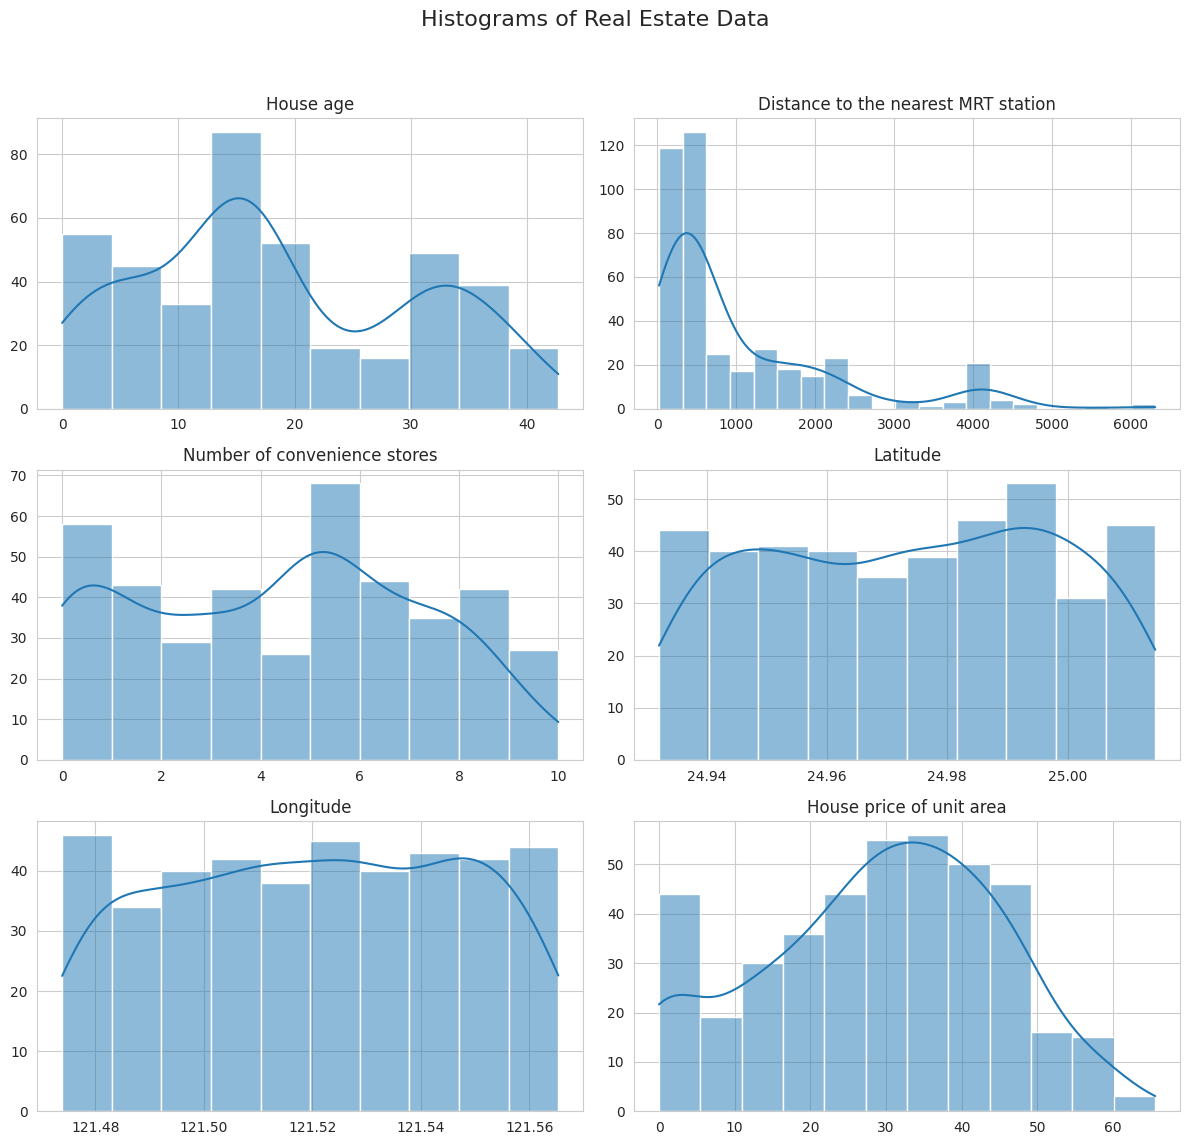

In [ ]:
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(pf[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**House Age**: This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).

**Distance to the Nearest MRT Station**: Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.

**Number of Convenience Stores**: Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.

**Latitude and Longitude**: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.

**House Price of Unit Area**: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

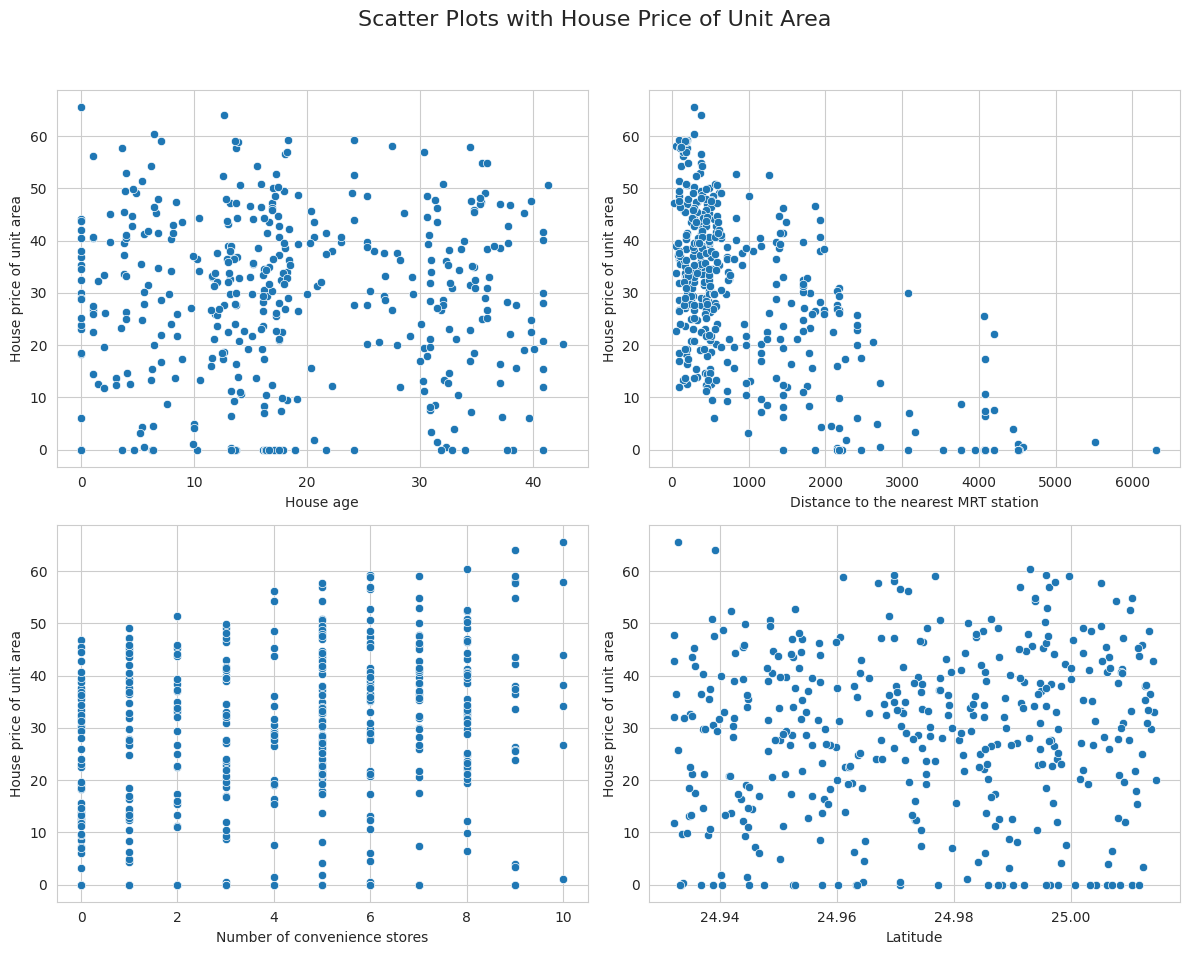

In [ ]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=pf, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=pf, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=pf, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=pf, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

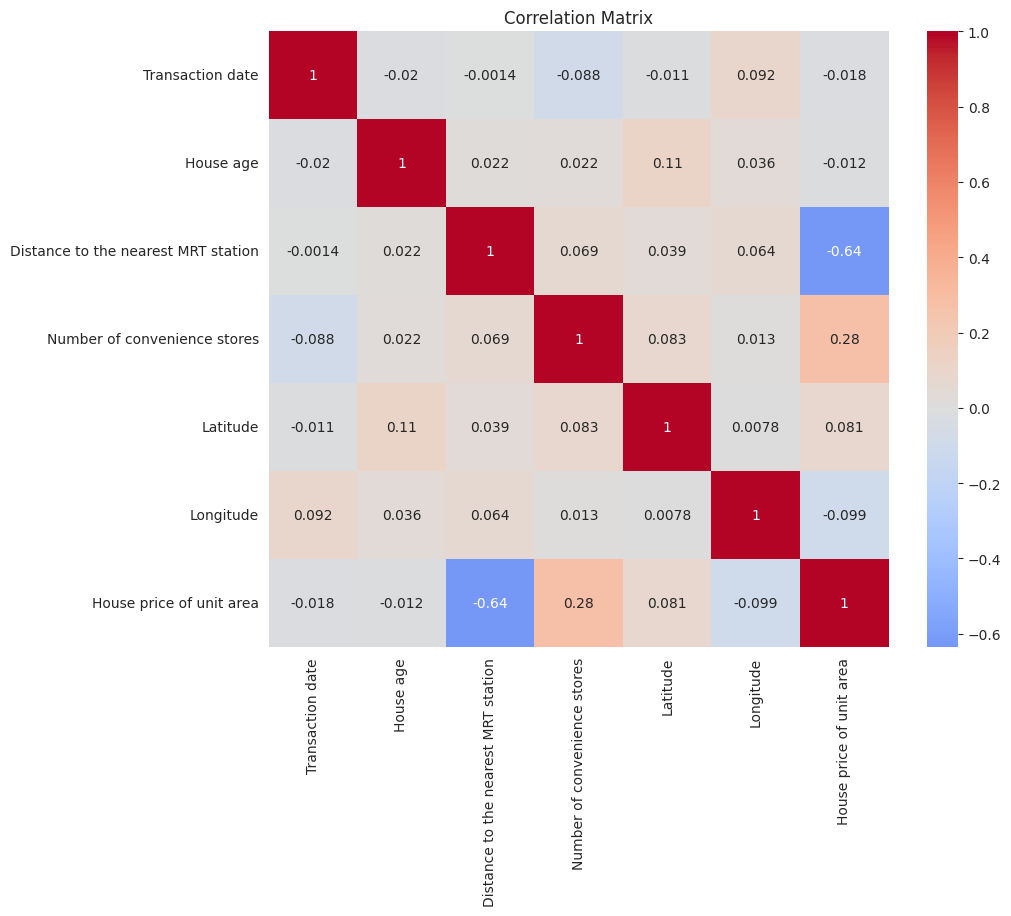

In [ ]:
# Correlation matrix

# Convert datetime to timestamp (seconds since epoch)
pf['Transaction date'] = pd.to_datetime(pf['Transaction date']).astype('int64') / 10**9

# Now include it in correlation
plt.figure(figsize=(10, 8))
sns.heatmap(pf.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

0.5101513056181489
RMSE: 11.16
MAE: 9.52
R²: 0.5497


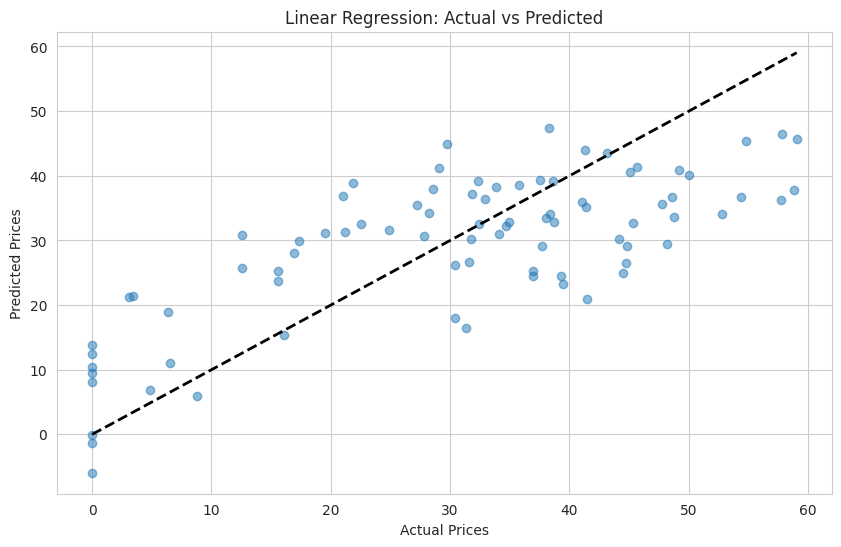

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Select features and target
features = ['Distance to the nearest MRT station',
            'Number of convenience stores',
            'Latitude',
            'Longitude']
target = 'House price of unit area'

X = pf[features]
y = pf[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

# Predict using the trained model
y_pred_lr = model.predict(X_test)

# Predict and evaluate
mse = mean_squared_error(y_test, y_pred_lr)
mte = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = mse ** 0.5  # Always works
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"RMSE: {lr_rmse:.2f}")
print(f"MAE: {mte:.2f}")
print(f"R²: {lr_r2:.4f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

0.9153721198894252
RMSE: 11.57
MAE: 9.70
R²: 0.5163


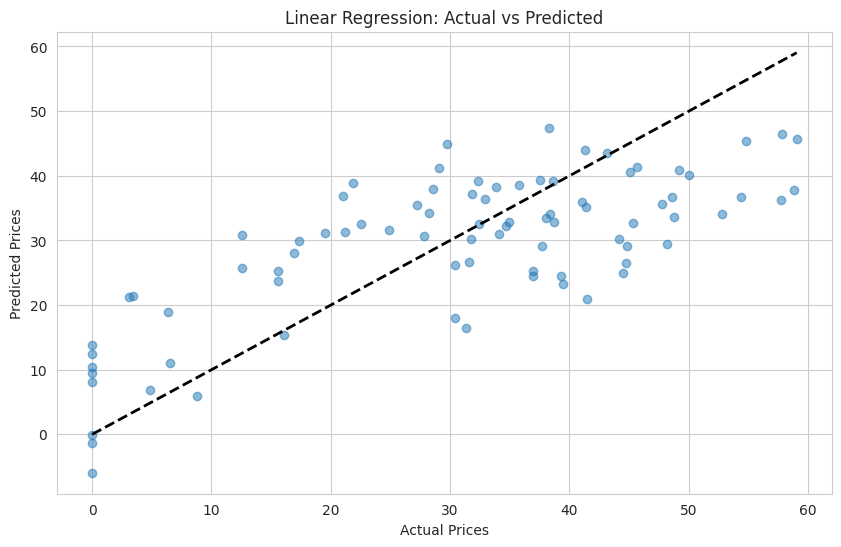

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Select features and target
features = ['Distance to the nearest MRT station',
            'Number of convenience stores',
            'Latitude',
            'Longitude']
target = 'House price of unit area'

X = pf[features]
y = pf[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = forest.predict(X_test)
forest.score(X_train, y_train)

mse = mean_squared_error(y_test, y_pred_rf)
mte = mean_absolute_error(y_test, y_pred_rf)
lr_rmse = mse ** 0.5
lr_r2 = r2_score(y_test, y_pred_rf)

print(forest.score(X_train, y_train))

print(f"RMSE: {lr_rmse:.2f}")
print(f"MAE: {mte:.2f}")
print(f"R²: {lr_r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

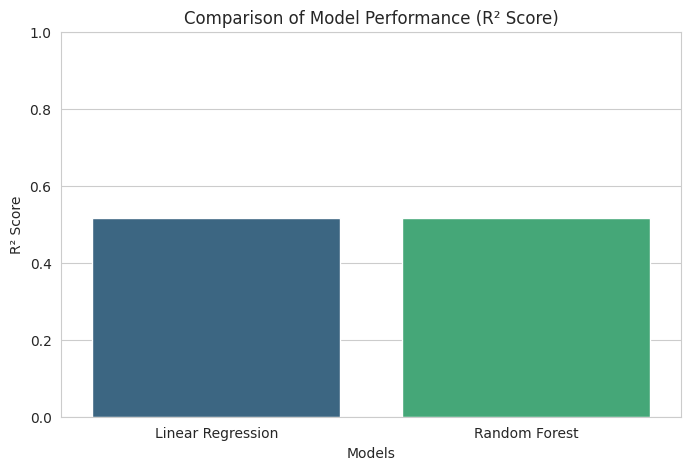

In [26]:
# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, y_pred_rf)

# Compare models using R² score
models = ['Linear Regression', 'Random Forest']
r2_scores = [lr_r2, rf_r2]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=r2_scores, palette='viridis', hue=models)
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Comparison of Model Performance (R² Score)')
plt.ylim(0, 1) # R² scores are typically between 0 and 1
plt.show()